### Title: Term Project
### Author: Jerock Kalala
### Date: November 18th 2022
### Professor: David Kinney
### Merging the Data and Storing in a Database/Visualizing Data

In [219]:
import pandas as pd
import sqlite3

#Reading our 3 cleaned and transformed datasets
df1 = pd.read_csv('E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Term_Project\\json.csv')
df2 = pd.read_csv('E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Term_Project\\html.csv')
df3 = pd.read_csv('E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Term_Project\\sika.csv')

In [220]:
# Create a connection to the SQLite database
# Doesn't matter if the database does not yet exist
conn = sqlite3.connect('termProject.db')

#create a cursor
c = conn.cursor()

In [221]:
#create a table
df1.to_sql('table1', conn, if_exists='replace', index=False)
df2.to_sql('table2', conn, if_exists='replace', index=False)
df3.to_sql('table3', conn, if_exists='replace', index=False)

#Select unique values from the created table3
df3 = pd.read_sql('SELECT * FROM table3 GROUP BY location', conn)
#conn.close()

In [222]:
#Display one table data
pd.read_sql('SELECT * FROM table1', conn)

,Unnamed: 0,Country,Country Code,New Cases,TotalCases,Deaths,Total Recovered,Observation
0,0,Afghanistan,AF,122,199310,7800,0,Yellow
1,1,Albania,AL,42,332263,3589,0,Yellow
2,2,Algeria,DZ,3,270676,6879,0,Yellow
3,3,Andorra,AD,0,46227,155,0,Green
4,4,Angola,AO,0,103131,1917,0,Yellow
...,...,...,...,...,...,...,...,...
192,192,Venezuela (Bolivarian Republic),VE,57,544860,5816,0,Yellow
193,193,Viet Nam,VN,672,11480028,43149,0,Red
194,194,Yemen,YE,0,11935,2157,0,Green
195,195,Zambia,ZM,18,333549,4017,0,Yellow


In [223]:
#creating a temp table by Joining the first two tables and Selecting important columns to plot
result = pd.read_sql('''SELECT date, total_cases, new_cases, positive_rate, total_deaths, total_vaccinations,
            population, life_expectancy, location
            FROM table3
            LEFT JOIN table2
            ON table3.location = table2.Country''', conn)
result.to_sql('tableTemp', conn, if_exists='replace', index=False)

725

In [224]:
#Creating the merged table by joining the temp table and the third one, again by specifying important colunms for visualization
final = pd.read_sql('''SELECT location, date, population, total_cases,new_cases,positive_rate,
            total_deaths, total_vaccinations, life_expectancy
            FROM tableTemp
            LEFT JOIN table1
            ON tableTemp.Location = table1.Country''', conn)
final.to_sql('merged_table', conn, if_exists='replace', index=False)

725

In [225]:
#Display date from the final merged table
pd.read_sql('SELECT * FROM merged_table', conn)

,location,date,population,total_cases,new_cases,positive_rate,total_deaths,total_vaccinations,life_expectancy
0,Afghanistan,2020,1.283218e+10,8.501751e+06,52332.0,0.0000,296447.0,0.000000e+00,20226.960
1,Afghanistan,2021,1.501200e+10,3.951838e+07,105754.0,0.0000,1778958.0,2.922512e+07,23662.951
2,Afghanistan,2022,1.320234e+10,5.869928e+07,46904.0,18.0756,2465302.0,4.085500e+08,20810.430
3,Africa,2020,4.608360e+11,2.932564e+08,2760926.0,0.0000,7001704.0,0.000000e+00,0.000
4,Africa,2021,5.207589e+11,2.223422e+09,6977423.0,0.0000,57042764.0,3.117776e+10,0.000
...,...,...,...,...,...,...,...,...,...
720,Zambia,2021,7.306449e+09,5.259303e+07,233549.0,27.4803,849928.0,7.953573e+07,23319.850
721,Zambia,2022,6.425672e+09,1.031036e+08,79411.0,14.0531,1276857.0,4.761148e+08,20508.690
722,Zimbabwe,2020,4.683995e+09,1.336283e+06,13873.0,13.3898,36683.0,0.000000e+00,17647.630
723,Zimbabwe,2021,5.956997e+09,3.006544e+07,199391.0,31.4384,1029500.0,8.962831e+08,22443.852


In [227]:
## save sqlite table in a DataFrame
df = pd.read_sql('SELECT * FROM merged_table', conn)

# write DataFrame to CSV file for
df.to_csv('E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Term_Project\\Codiv_2020.csv', index = False)

##### Ploting using matplotlib

##### Note: Due to the volume of data, were going to query some data and plot them

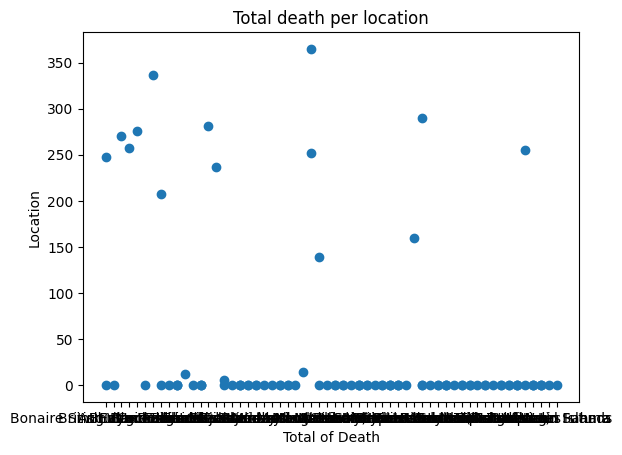

In [228]:
# importing matplotlib library
import matplotlib.pyplot as plt

df1 = pd.read_sql('SELECT * FROM merged_table WHERE total_deaths <= 380', conn)
plt.scatter(df1['location'],
            df1['total_deaths'])
plt.title("Total death per location")
plt.ylabel("Location")
plt.xlabel("Total of Death")

plt.show()

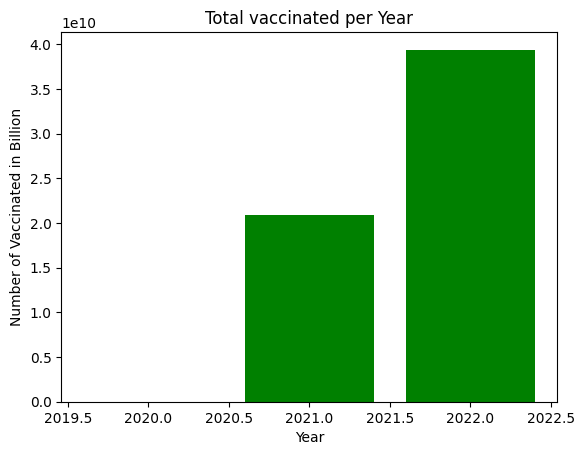

In [267]:
#bar plot showing the number of vaccinated 2021-2022
df2 = pd.read_sql('SELECT * FROM merged_table WHERE population > 40000000000', conn)
plt.bar(df1['date'],
            df1['total_vaccinations'], color = 'green')
plt.title("Total vaccinated per Year")
plt.ylabel("Number of Vaccinated in Billion")
plt.xlabel("Year")

plt.show()

3 other visualizations are done using Power BI (see attached .PDF file.

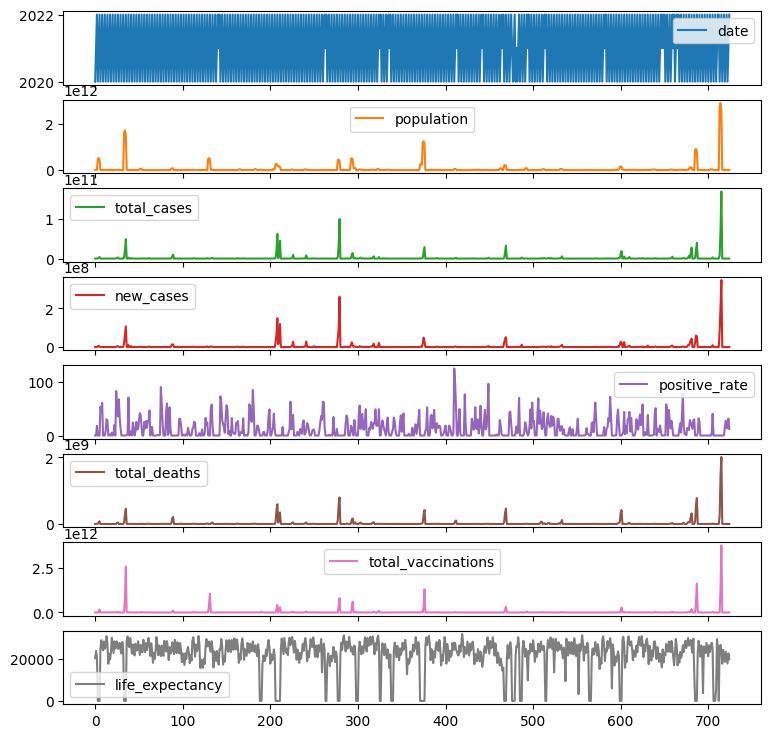

In [234]:
df.plot(subplots=True, figsize=(9, 9)); plt.legend(loc='best')

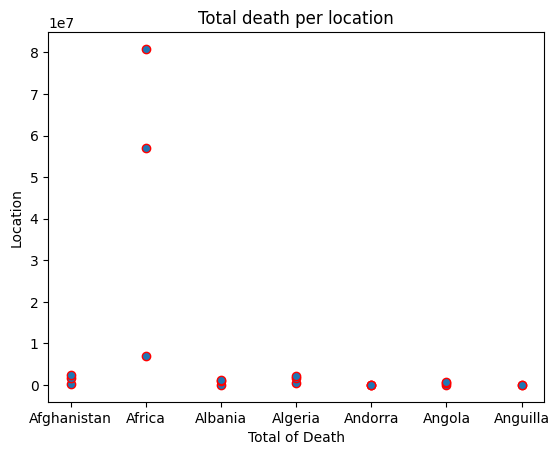

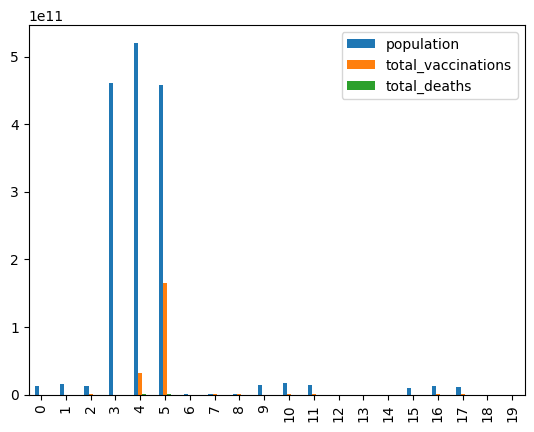

In [268]:
#Sctter plot and bar chart of the 20 first rows
df2 = pd.read_sql('''SELECT location, population, total_vaccinations, total_deaths
                FROM merged_table ORDER BY location
                LIMIT 20''', conn)
plt.scatter(df2['location'],
            df2['total_deaths'], edgecolors='red')
plt.title("Total death per location")
plt.ylabel("Location")
plt.xlabel("Total of Death")

#plt.show()

df2.plot(kind='bar');

<AxesSubplot: title={'center': 'Statistics By Continent'}, xlabel='location', ylabel='Im Billion'>

<Figure size 640x480 with 0 Axes>

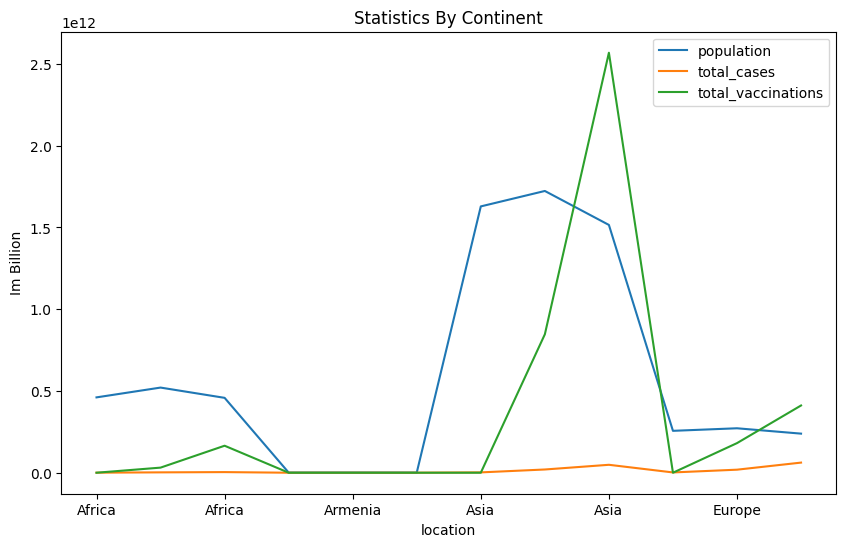

In [269]:
#Selecting only data from continent and using line plot for comparison
df3 = pd.read_sql('''SELECT *
                FROM merged_table
                where location== "Africa"
                OR location== "Europe"
                OR location== "Armenia"
                OR location== "Asia"
                ''', conn)
plt.figure()
df3.plot.line(y=['population', 'total_cases', 'total_vaccinations'], x='location', figsize=(10,6),
              title='Statistics By Continent', ylabel='Im Billion')